In [1]:
from collections import Counter

data = ['H', 'T', 'H', 'H', 'T', 'H', 'T', 'T']
counts = Counter(data)
prob_H = counts['H'] / len(data)
prob_T = counts['T'] / len(data)
 

print("P(H):", prob_H)
print("P(T):", prob_T)


P(H): 0.5
P(T): 0.5


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset = [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107,10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

(array([31.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([ 10. ,  19.8,  29.6,  39.4,  49.2,  59. ,  68.8,  78.6,  88.4,
         98.2, 108. ]),
 <BarContainer object of 10 artists>)

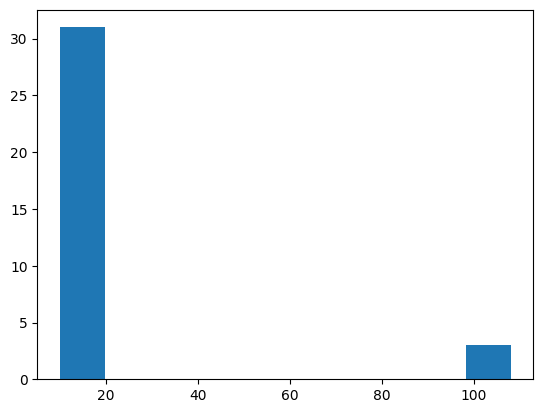

In [4]:
plt.hist(dataset)

In [5]:
## Z-Score

outliers = []

def detect_outliers(data):
    threshold=3
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i - mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
            
    return outliers
                

In [6]:
detect_outliers(dataset)

[102, 107, 108]

In [7]:
# IQR
# Sort the data
# Calculate Q1 aqnd Q3
# IQR(Q3-Q1)
# Find the Lower fence(q1-1.5(iqr))
# Find the upper fence(q3+1.5(iqr))

In [8]:
dataset = sorted(dataset)

print(dataset)

[10, 10, 10, 10, 10, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 17, 19, 102, 107, 108]


In [9]:
q1 ,q3 = np.percentile(dataset,[25,75])

q1,q3

(np.float64(12.0), np.float64(15.0))

In [10]:
iqr = q3 - q1

In [11]:
lower_fence = q1-(1.5*iqr)

higher_fence = q3+(1.5*iqr)

print(lower_fence, higher_fence)

7.5 19.5


In [12]:
import seaborn as sns

<Axes: >

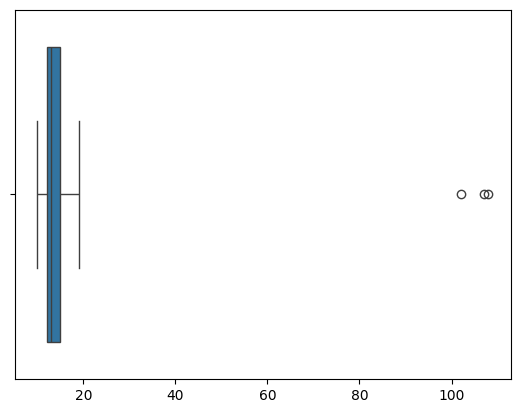

In [13]:
sns.boxplot(x=dataset)

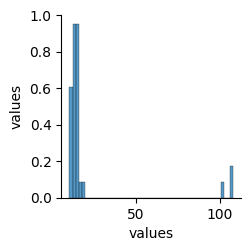

In [14]:
import pandas as pd

df = pd.DataFrame(dataset, columns=['values'])

sns.pairplot(df)

In [15]:
print(dataset, end ='')

[10, 10, 10, 10, 10, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 17, 19, 102, 107, 108]

In [16]:
from statsmodels.stats.weightstats import ztest as ztest

In [17]:
ztest(dataset, value=110)

(np.float64(-19.348039656267254), np.float64(2.1174388723658536e-83))

In [18]:
#T test

ages_mean = np.mean(dataset)
ages_mean

np.float64(21.176470588235293)

In [19]:
sample_size = 10
age_sample = np.random.choice(dataset,sample_size)
age_sample

array([15, 14, 12, 15, 12, 13, 12, 14, 14, 15])

In [20]:
from scipy.stats import ttest_1samp

ttest_1samp(age_sample,27)

TtestResult(statistic=np.float64(-33.5), pvalue=np.float64(9.274179562845144e-11), df=np.int64(9))

In [32]:
from sklearn.datasets import fetch_california_housing

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [13]:
df = fetch_california_housing()
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [16]:
dataset = pd.DataFrame(df.data)

dataset


,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
dataset.columns = df.feature_names



In [28]:
dataset = dataset.drop('Price', axis=1)

In [25]:
dataset['MedHouseVal'] = df.target

In [29]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [37]:
y = dataset['MedHouseVal']
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [38]:
x = dataset.drop('MedHouseVal', axis=1)
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [46]:
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.2)



In [ ]:
##Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


In [50]:
lr = LinearRegression()

lr.fit(x_train, y_train)

LinearRegression()

In [51]:
y_lr_train_pred = lr.predict(x_train)

y_lr_test_pred = lr.predict(x_test)

y_lr_train_pred[:5]

array([2.1487453 , 1.59309194, 3.06663858, 2.15926136, 2.6376685 ])

In [52]:
y_lr_test_pred[:5]

array([2.87025266, 2.91746327, 2.28573662, 3.41485651, 1.98193492])

In [107]:
from sklearn.metrics import mean_squared_error , r2_score

lr_train_msr = mean_squared_error(y_train , y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_msr = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

# print('lr_train_msr:', lr_train_msr)
# print('lr_train_r2:', lr_train_r2)
# print('lr_test_msr:', lr_test_msr)
# print('lr_test_r2:', lr_test_r2)

lr_df = pd.DataFrame(['california housing','Linear Regression', lr_train_msr, lr_train_r2, lr_test_msr, lr_test_r2]).transpose()
lr_df.columns = ['Data Name','Method', 'train_msr', 'train_r2', 'test_msr', 'test_r2']
lr_df

,Data Name,Method,train_msr,train_r2,test_msr,test_r2
0,california housing,Linear Regression,0.519427,0.607674,0.544741,0.599816


In [93]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [106]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

rf_train_msr = mean_squared_error(y_train , y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_msr = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

# print('rf_train_msr:', rf_train_msr)
# print('rf_train_r2:', rf_train_r2)
# print('rf_test_msr:', rf_test_msr)
# print('rf_test_r2:', rf_test_r2)

rf_df = pd.DataFrame(['california housing','Random Forest Regression', rf_train_msr, rf_train_r2, rf_test_msr, rf_test_r2]).transpose()
rf_df.columns = ['Data Name','Method', 'train_msr', 'train_r2', 'test_msr', 'test_r2']
rf_df

,Data Name,Method,train_msr,train_r2,test_msr,test_r2
0,california housing,Random Forest Regression,0.034982,0.973578,0.268144,0.803013


In [59]:
## Trying boston data

bdf = pd.read_csv('train.csv')

bdf

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
331,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [61]:
by = bdf['medv']
by

0      24.0
1      21.6
2      33.4
3      36.2
4      22.9
       ... 
328    17.5
329    22.4
330    20.6
331    23.9
332    11.9
Name: medv, Length: 333, dtype: float64

In [64]:
bx = bdf.drop('medv', axis=1)
bx

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10
329,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
330,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
331,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64


In [80]:
bx_train, bx_test, by_train, by_test = train_test_split(bx, by)
bx_train


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
70,104,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44
332,506,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88
207,311,2.63548,0.0,9.90,0,0.544,4.973,37.8,2.5194,4,304,18.4,350.45,12.64
40,62,0.17171,25.0,5.13,0,0.453,5.966,93.4,6.8185,8,284,19.7,378.08,14.44
201,304,0.10000,34.0,6.09,0,0.433,6.982,17.7,5.4917,7,329,16.1,390.43,4.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,273,0.11460,20.0,6.96,0,0.464,6.538,58.7,3.9175,3,223,18.6,394.96,7.73
164,241,0.11329,30.0,4.93,0,0.428,6.897,54.3,6.3361,6,300,16.6,391.25,11.38
150,222,0.40771,0.0,6.20,1,0.507,6.164,91.3,3.0480,8,307,17.4,395.24,21.46
198,298,0.14103,0.0,13.92,0,0.437,5.790,58.0,6.3200,4,289,16.0,396.90,15.84


In [81]:
by_train

70     19.3
332    11.9
207    16.1
40     16.0
201    33.1
       ... 
183    24.4
164    22.0
150    21.7
198    20.3
122    23.2
Name: medv, Length: 249, dtype: float64

In [ ]:
blr = LinearRegression()

blr.fit(bx_train, by_train)

LinearRegression()

In [83]:
by_blr_train_pred = blr.predict(bx_train)
by_blr_test_pred = blr.predict(bx_test)


by_blr_train_pred[:5]

array([20.62899313, 22.16165642, 18.44091336, 17.13101136, 32.42629393])

In [108]:
blr_train_msr = mean_squared_error(by_train , by_blr_train_pred)
blr_train_r2 = r2_score(by_train, by_blr_train_pred)

blr_test_msr = mean_squared_error(by_test, by_blr_test_pred)
blr_test_r2 = r2_score(by_test, by_blr_test_pred)

# print('blr_train_msr:', blr_train_msr)
# print('blr_train_r2:', blr_train_r2)
# print('blr_test_msr:', blr_test_msr)
# print('blr_test_r2:', blr_test_r2)

blr_df = pd.DataFrame(['Boston Housing','Linear Regression', blr_train_msr, blr_train_r2, blr_test_msr, blr_test_r2]).transpose()
blr_df.columns = ['Data Name','Method', 'train_msr', 'train_r2', 'test_msr', 'test_r2']
blr_df

,Data Name,Method,train_msr,train_r2,test_msr,test_r2
0,Boston Housing,Linear Regression,21.14071,0.749536,28.5327,0.653708


In [109]:
brf = RandomForestRegressor()
brf.fit(bx_train, by_train)

by_brf_train_pred = brf.predict(bx_train)
by_brf_test_pred = brf.predict(bx_test)


brf_train_msr = mean_squared_error(by_train , by_brf_train_pred)
brf_train_r2 = r2_score(by_train, by_brf_train_pred)

brf_test_msr = mean_squared_error(by_test, by_brf_test_pred)
brf_test_r2 = r2_score(by_test, by_brf_test_pred)

# print('brf_train_msr:', brf_train_msr)
# print('brf_train_r2:', brf_train_r2)
# print('brf_test_msr:', brf_test_msr)
# print('bfr_test_r2:', brf_test_r2)

brf_df= pd.DataFrame(['Boston Housing','Random Forest Regression', brf_train_msr, brf_train_r2, brf_test_msr, brf_test_r2]).transpose()
brf_df.columns = ['Data Name','Method', 'train_msr', 'train_r2', 'test_msr', 'test_r2']
brf_df

,Data Name,Method,train_msr,train_r2,test_msr,test_r2
0,Boston Housing,Random Forest Regression,1.782519,0.978882,13.410449,0.837242


In [134]:
df_model = pd.concat([lr_df, rf_df,knn_df, blr_df, brf_df, bknn_df], axis=0).reset_index(drop=True)

df_model

,Data Name,Method,train_msr,train_r2,test_msr,test_r2
0,california housing,Linear Regression,0.519427,0.607674,0.544741,0.599816
1,california housing,Random Forest Regression,0.034982,0.973578,0.268144,0.803013
2,california housing,KNeighbors Regressor,0.723208,0.453758,1.145045,0.158813
3,Boston Housing,Linear Regression,21.14071,0.749536,28.5327,0.653708
4,Boston Housing,Random Forest Regression,1.782519,0.978882,13.410449,0.837242
5,Boston Housing,KNeighbors Regressor,25.761982,0.694786,44.24559,0.463006


In [ ]:
import seaborn as sns

# sns.pairplot(x)

In [126]:
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import accuracy_score, classification_report

In [127]:
knn = KNeighborsRegressor()

knn.fit(x_train, y_train)

KNeighborsRegressor()

In [128]:
y_knn_train_pred = knn.predict(x_train)

y_knn_test_pred = knn.predict(x_test)

y_knn_train_pred[:5]

array([1.7368, 2.2892, 2.7966, 2.7166, 2.4446])

In [129]:
knn_train_msr = mean_squared_error(y_train , y_knn_train_pred)
knn_train_r2 = r2_score(y_train, y_knn_train_pred)

knn_test_msr = mean_squared_error(y_test, y_knn_test_pred)
knn_test_r2 = r2_score(y_test, y_knn_test_pred)

print('knn_train_msr:', knn_train_msr)
print('knn_train_r2:', knn_train_r2)
print('knn_test_msr:', knn_test_msr)
print('knn_test_r2:', knn_test_r2)

knn_train_msr: 0.723207684447594
knn_train_r2: 0.45375754396967904
knn_test_msr: 1.1450447924108207
knn_test_r2: 0.15881271071681946


In [130]:
knn_df = pd.DataFrame(['california housing','KNeighbors Regressor', knn_train_msr, knn_train_r2, knn_test_msr, knn_test_r2]).transpose()
knn_df.columns = ['Data Name','Method', 'train_msr', 'train_r2', 'test_msr', 'test_r2']
knn_df

,Data Name,Method,train_msr,train_r2,test_msr,test_r2
0,california housing,KNeighbors Regressor,0.723208,0.453758,1.145045,0.158813


In [ ]:
bknn = KNeighborsRegressor()

bknn.fit(bx_train, by_train)

by_bknn_train_pred = bknn.predict(bx_train)

by_bknn_test_pred = bknn.predict(bx_test)

by_bknn_train_pred[:5]

bknn_train_msr = mean_squared_error(by_train , by_bknn_train_pred)
bknn_train_r2 = r2_score(by_train, by_bknn_train_pred)

bknn_test_msr = mean_squared_error(by_test, by_bknn_test_pred)
bknn_test_r2 = r2_score(by_test, by_bknn_test_pred)

# print('bknn_train_msr:', bknn_train_msr)
# print('bknn_train_r2:', bknn_train_r2)
# print('bknn_test_msr:', bknn_test_msr)
# print('bknn_test_r2:', bknn_test_r2)

bknn_df = pd.DataFrame(['Boston Housing','KNeighbors Regressor', bknn_train_msr, bknn_train_r2, bknn_test_msr, bknn_test_r2]).transpose()
bknn_df.columns = ['Data Name','Method', 'train_msr', 'train_r2', 'test_msr', 'test_r2']
bknn_df

bknn_train_msr: 25.761982329317267
bknn_train_r2: 0.6947856409780717
bknn_test_msr: 44.245590476190465
bknn_test_r2: 0.46300647680505425


,Data Name,Method,train_msr,train_r2,test_msr,test_r2
0,Boston Housing,KNeighbors Regressor,25.761982,0.694786,44.24559,0.463006
